In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_excel('loan.xlsx')

In [3]:
#Since, the predictor variable will be of column 'loan_status', we will eradicate 'Current' so as to classify it between 'Fully Paid' and 'Charged Off'
dataset = dataset[dataset.loan_status !='Current']
dataset = dataset.loc[:,dataset.nunique()!=1]

In [4]:
#removing unnecessary columns
#This removes columns with only one value
dframe = dataset.loc[:,dataset.nunique()!=1]
dframe.shape

(38577, 100)

In [28]:
#pre processing the data
X = dframe.iloc[:,[2, 5, 6, 8, 11, 12, 13, 22, 23, 24, 30, 31, 34]].values
Y = dframe.iloc[:, 16].values

In [30]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1]) #term
X[:, 3] = labelencoder_X.fit_transform(X[:, 3]) #grade
X[:, 4] = labelencoder_X.fit_transform(X[:, 4]) #emp_length
X[:, 5] = labelencoder_X.fit_transform(X[:, 5]) #home_ownership
X[:, 7] = labelencoder_X.fit_transform(X[:, 7]) #addr_state

#one hot encoding 'addr_state'
onehotencoder = OneHotEncoder(categorical_features=[7])
X = onehotencoder.fit_transform(X).toarray()

labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

/home/satyam/.local/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
# Fitting Random Forest classifier to the Training set to predict further bank customers
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
# prediction
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred) * 100

94.02799377916018


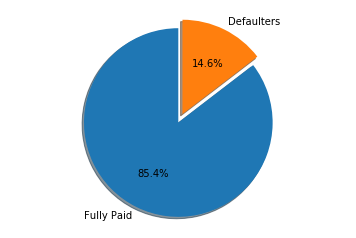

In [9]:
c = 0
for i in range(len(Y)):
    if Y[i] == 1:
        c += 1    
labels = 'Fully Paid', 'Defaulters'
sizes = [c, len(Y) - c]
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.show()

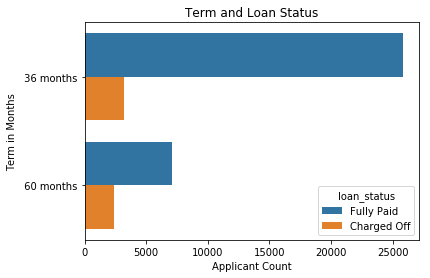

In [10]:
import seaborn
#dframe['term'] = dframe['term'].replace('months','',regex =True)
#dframe['loan_status'] = dframe["loan_status"].replace(['Fully Paid','Charged Off'],[0, 1])
seaborn.countplot(y = 'term',hue='loan_status',data = dframe)
plt.xlabel('Applicant Count')
plt.ylabel('Term in Months')
plt.title('Term and Loan Status')
plt.show()

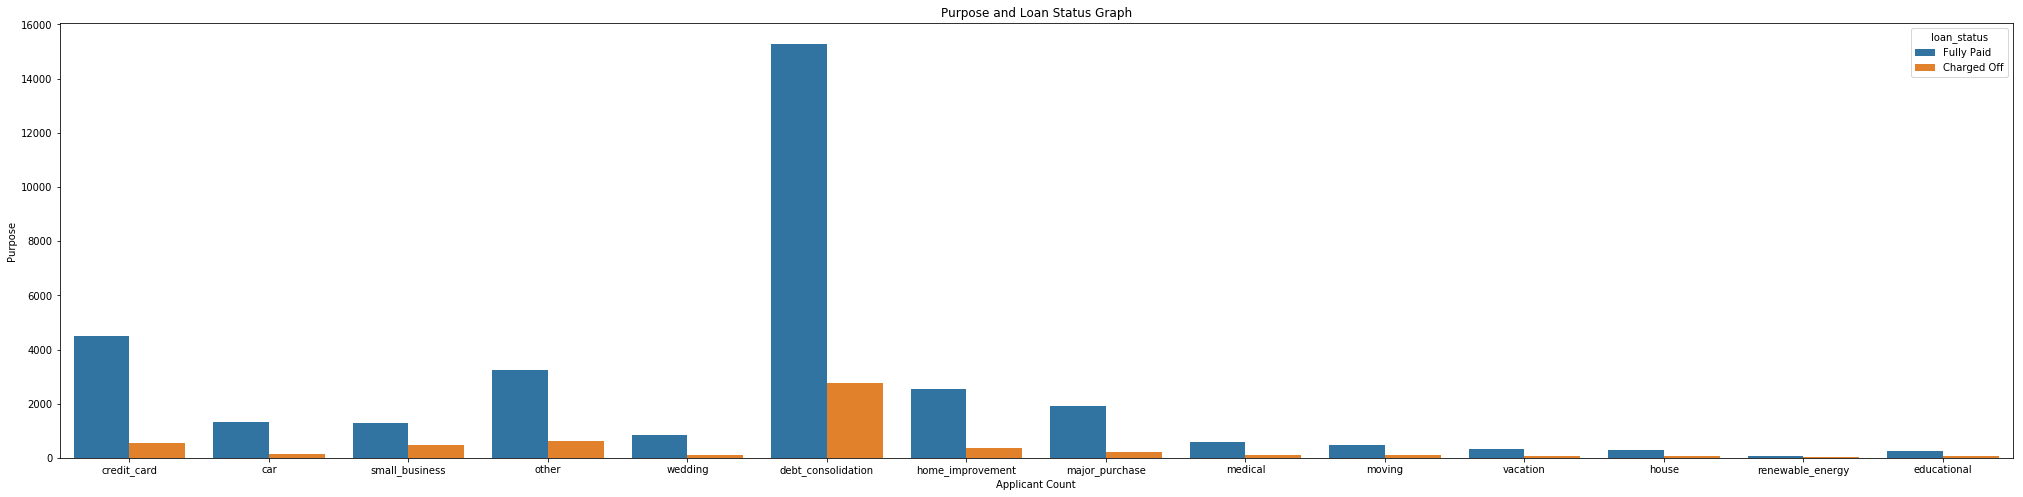

In [11]:
plt.figure(figsize=(35,8))
seaborn.countplot('purpose',hue = 'loan_status',data = dframe)
plt.ylabel('Purpose')
plt.xlabel('Applicant Count')
plt.title('Purpose and Loan Status Graph')
plt.show()

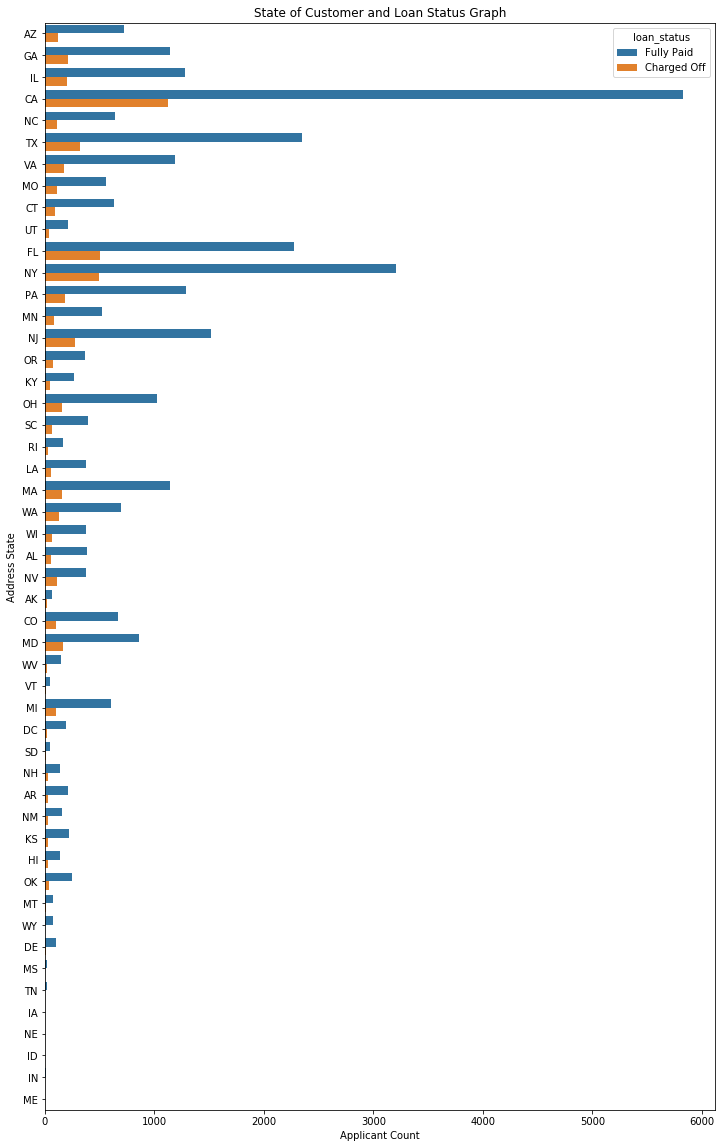

In [12]:
plt.figure(figsize=(12,20))
seaborn.countplot(y = 'addr_state',hue = 'loan_status',data = dframe)
plt.ylabel('Address State')
plt.xlabel('Applicant Count')
plt.title('State of Customer and Loan Status Graph')
plt.show()

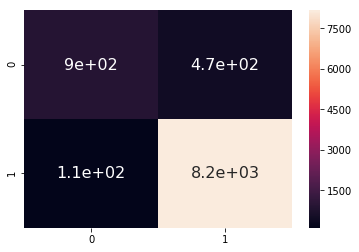

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, range(2),
                  range(2))

seaborn.heatmap(df_cm, annot = True, annot_kws = {"size": 16})# font size

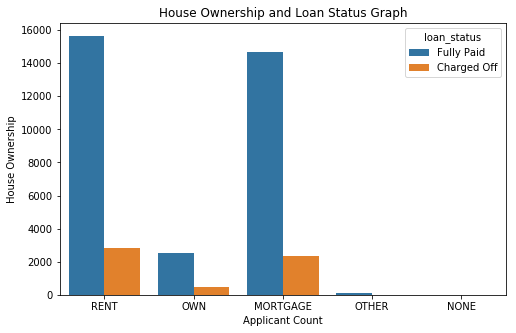

In [14]:
plt.figure(figsize=(8,5))
seaborn.countplot(x = 'home_ownership',hue = 'loan_status',data = dframe)
plt.ylabel('House Ownership')
plt.xlabel('Applicant Count')
plt.title('House Ownership and Loan Status Graph')
plt.show()

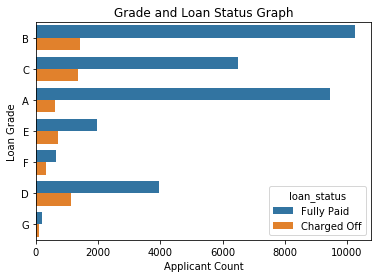

In [15]:
seaborn.countplot(y = 'grade',hue = 'loan_status',data = dframe)
plt.ylabel('Loan Grade')
plt.xlabel('Applicant Count')
plt.title('Grade and Loan Status Graph')
plt.show()